# Customer Credit card use prediction

## Attribute Information
 - ID         : Customer ID
 - Age        : Customer's age in completed years
 - Experience : No. of years of professional experience
 - Income     : Annual income of the customer ($ 000)
 
 - ZIP Code   : Home Address Zip Code
 - Family     : Family size of the customer
 - CCAvg      : Avg. Spending on Credit Card per Month ($ 000)
 
 - Education  : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional
 - Mortgage   : Value of house mortgage if any. ($000)
 - Personal Loan : Did this customer accept the personal loan offered in the last campaign?
 - Securities Account : Does the customer have a securities account with the bank?
 - CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
 - Online : Does the customer use internet banking facilities?
 - Credit card : Does the customer use a credit card issued by this Bank?

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'g')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(223)
    ax2 = sns.violinplot(x = df[x], palette = 'flare', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 23
Q1                    : 35.0
Q2(Median)            : 45.0
Q3                    : 55.0
Age(max) : 67


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


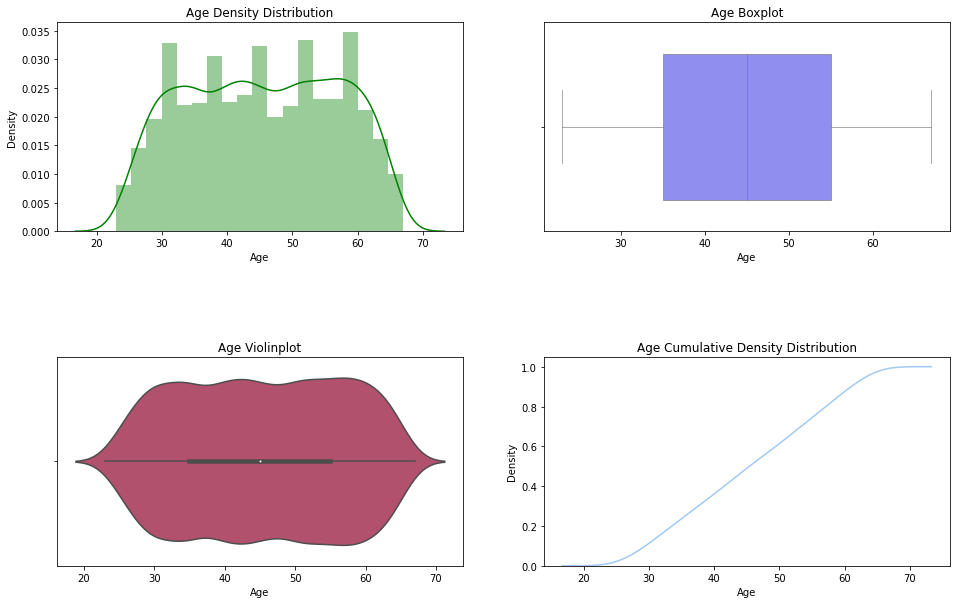

In [7]:
summary('Age')

Age uniformly distributed 

5 Point Summary of Income Attribute:
Income(min) : 8
Q1                    : 39.0
Q2(Median)            : 64.0
Q3                    : 98.0
Income(max) : 224


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


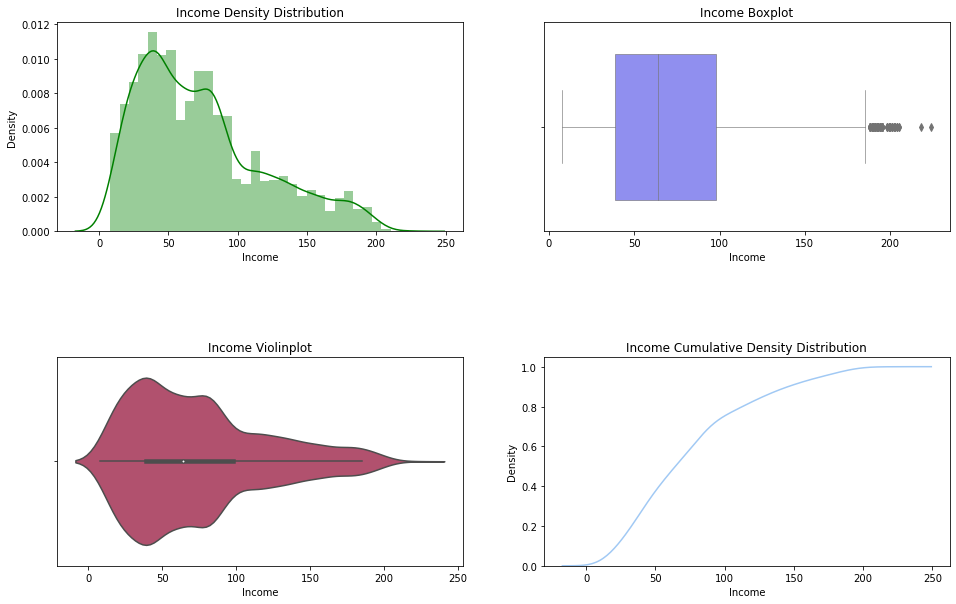

In [8]:
summary('Income')

Income lighyly skewed in left 

In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


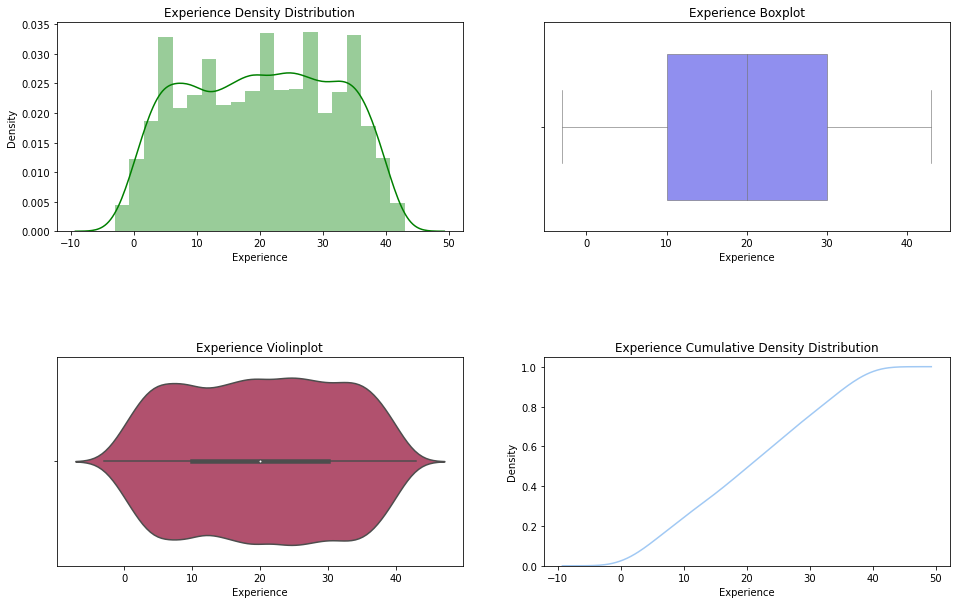

In [10]:
summary('Experience')

5 Point Summary of Mortgage Attribute:
Mortgage(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 101.0
Mortgage(max) : 635


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


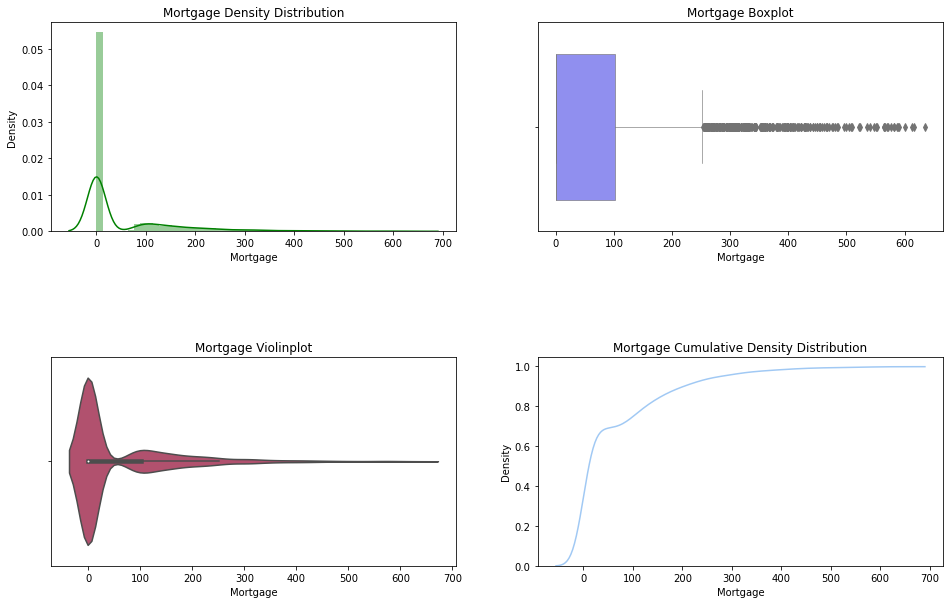

In [11]:
summary('Mortgage')

Morgage have high outlier values and density distribution heavily trailed 

5 Point Summary of Ccavg Attribute:
Ccavg(min) : 0.0
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.5
Ccavg(max) : 10.0


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


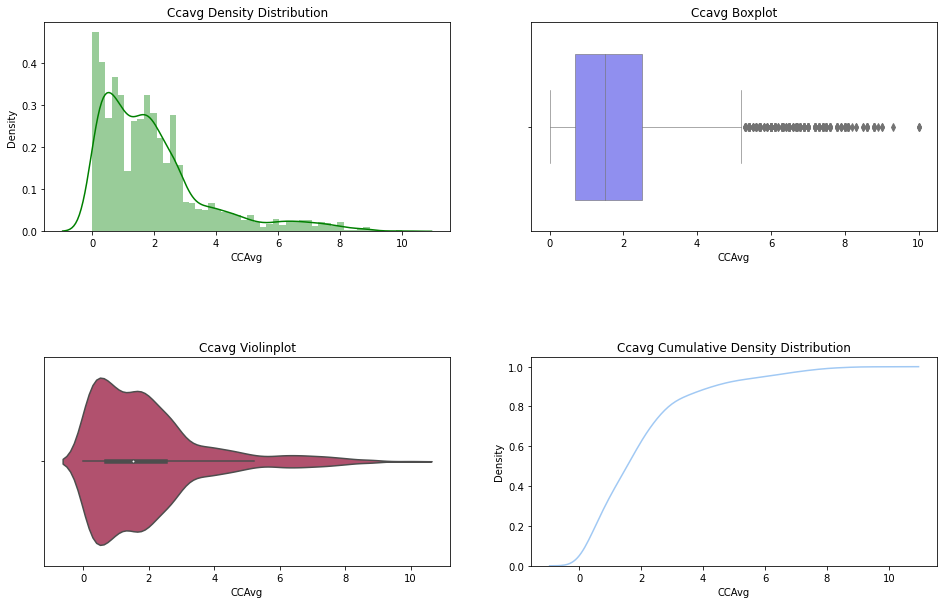

In [12]:
summary('CCAvg')

In [13]:
def uni_view(x):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = df.groupby(x).size()

    mydf_values = s.values.tolist()
    mydf_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydf_values, autopct=lambda pct: func(pct, mydf_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydf_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df1 = pd.pivot_table(df, index = [x], columns = ['CreditCard'], values = ['Income'], aggfunc = len)

    labels = df1.index.tolist()
    CreditCard_no = df1.values[:, 0].tolist()
    CreditCard_yes = df1.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, CreditCard_no, width, label='No CreditCard', color = color1)
    rects2 = ax[1].bar(l + width/2, CreditCard_yes, width, label='CreditCard', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

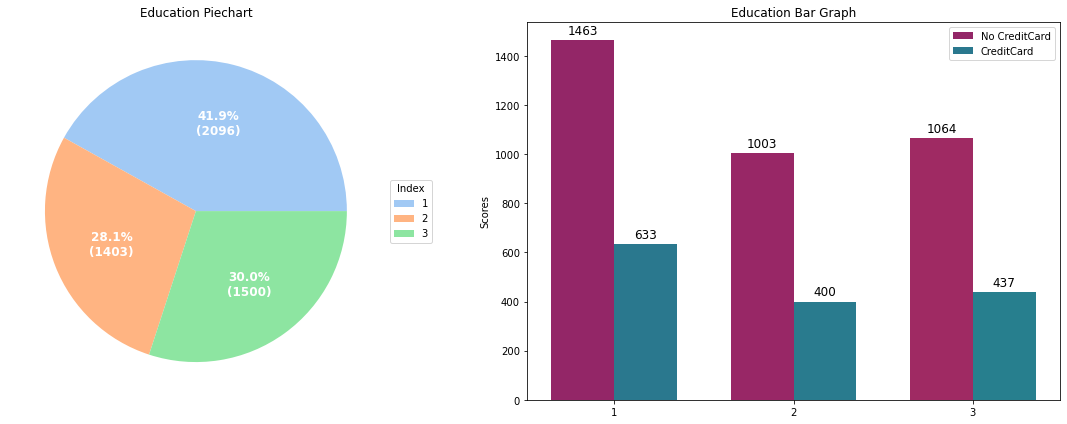

In [14]:
uni_view('Education')

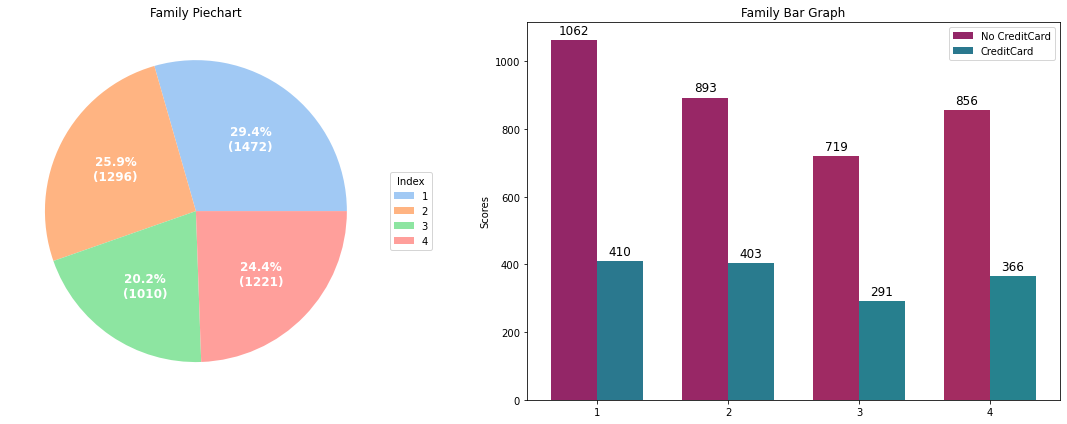

In [15]:
uni_view('Family')

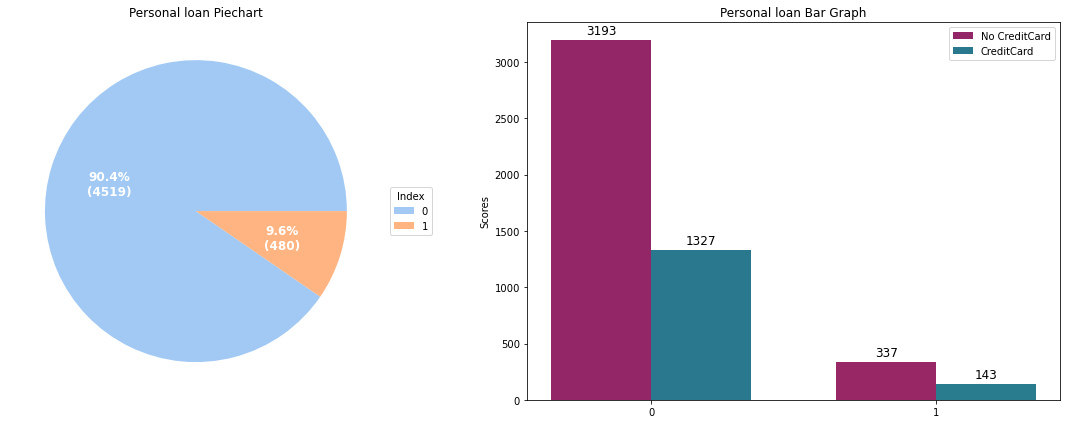

In [16]:
uni_view('Personal Loan')

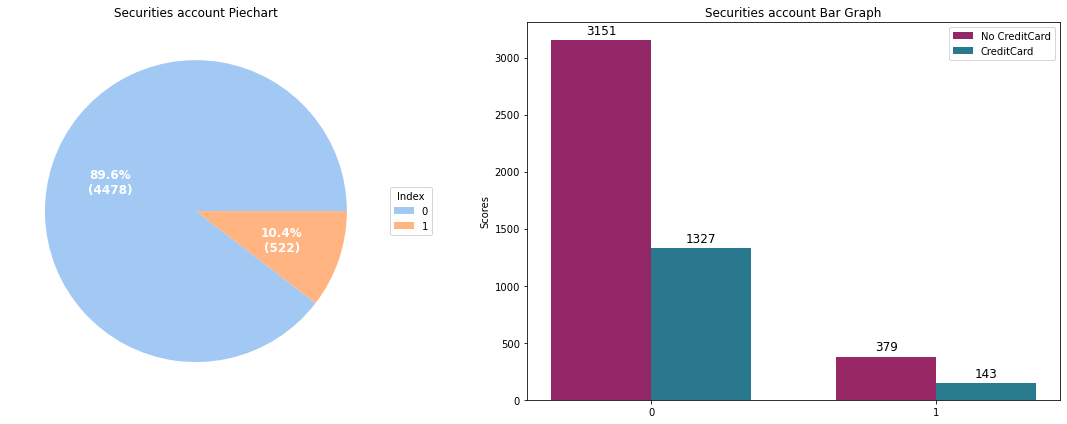

In [17]:
uni_view('Securities Account')

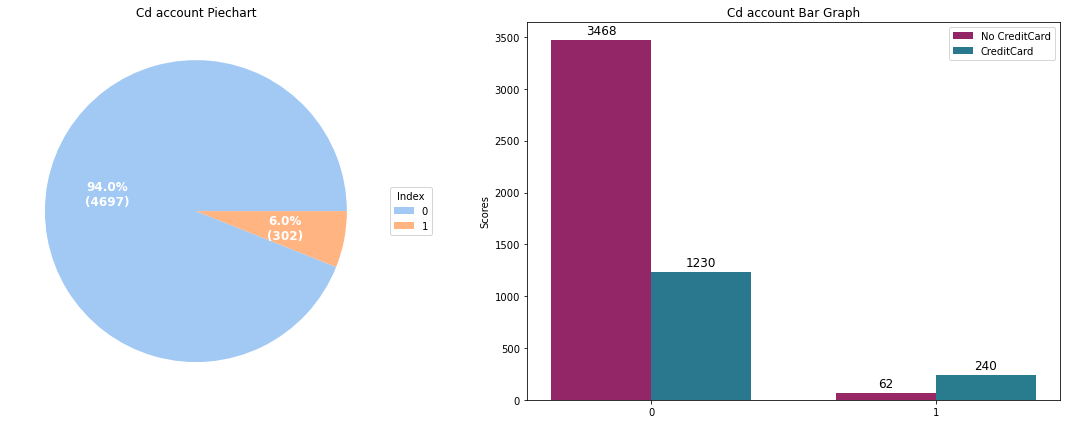

In [18]:
uni_view('CD Account')

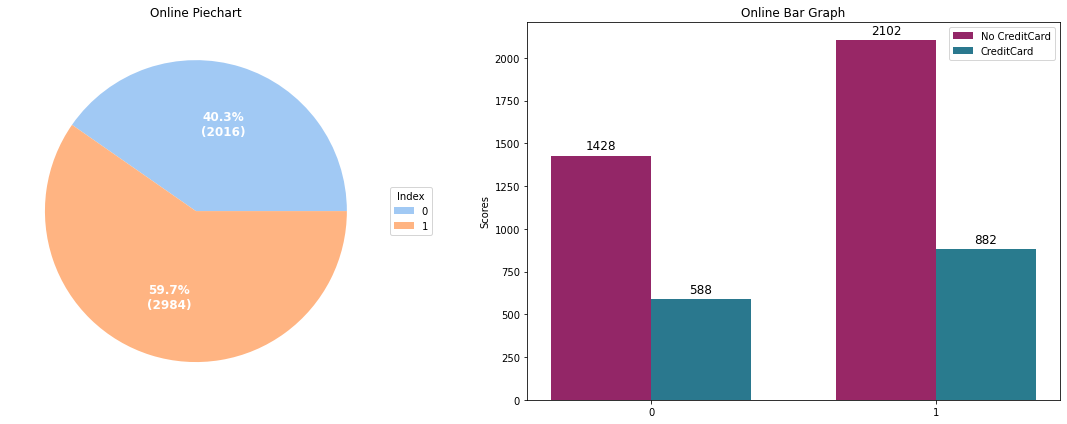

In [19]:
uni_view('Online')

Security account , personal loan and CD account are havily imbalanced 

In [20]:
X = df.drop('CreditCard', axis = 1)
Y = df[['CreditCard']]

In [21]:
X.shape

(5000, 13)

In [22]:
Y.shape

(5000, 1)

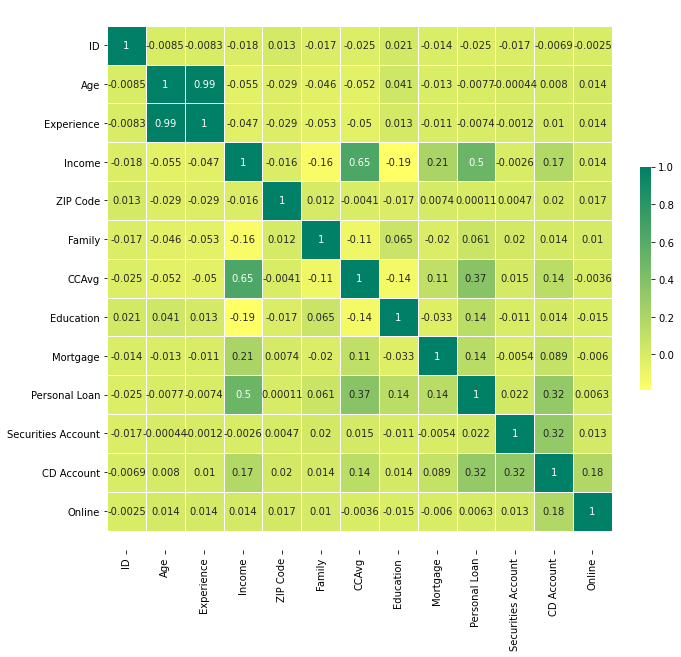

In [23]:
corr = X.corr()
plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Age and Experience highly correlated.
Securities and CD account medium correlated 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [25]:
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    print(f'{model[0]} Recall: {recall}')
    print(f'{model[0]} f1 - score: {f1}')

In [26]:
train_model(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: DataConversionWarning: A column-vector y was passed whe

Confusion matrix: Random Forest
[[2717  107]
 [ 961  215]]

Random Forest Accuracy: 0.733
Random Forest Precision: 0.6677018633540373
Random Forest Recall: 0.1828231292517007
Random Forest f1 - score: 0.2870493991989319


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1')

In [28]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

In [29]:
rf_clf = grid_search.best_estimator_

In [30]:
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='category')

num_attribs = list(X_train_num.columns)
cat_attribs = list(X_train_cat.columns)

transformer = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = transformer.fit_transform(X_train)
print(X_train.shape)
X_train[1, :]

(4000, 13)


array([-1.195533  , -0.03874477, -0.45746122,  2.75406344, -0.80287825,
        0.51425774,  4.61897845,  1.33027215, -0.55542799,  3.        ,
       -0.33931991, -0.25709547, -1.21396736])

In [31]:
y_train = np.array(y_train)
print(y_train.shape)

(4000, 1)


In [32]:
X_test = transformer.fit_transform(X_test)
print(X_test.shape)

(1000, 13)


In [33]:
y_test = np.array(y_test)
print(y_test.shape)

(1000, 1)


In [34]:
rf_clf.fit(X_test, y_test)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_features=8, n_estimators=3, random_state=42)

In [35]:
y_test_predict = rf_clf.predict(X_test)

In [36]:
rf_clf.score(X_test, y_test)

0.935

In [37]:
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.90      0.87      0.89       294
           0       0.95      0.96      0.95       706

    accuracy                           0.94      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.94      0.93      1000

